# Oracle CPU analysis

Datafile: oracle_cpu_free_percent_2020.11.14.csv

Read the datafile


In [18]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('./oracle_cpu_free_percent_2020.11.14.csv',
                 index_col='timestamp_per_hour',
                 parse_dates=['timestamp_per_hour'],
                 #date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                 date_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                )

df['idle_cpu_pct'] = df.avg_cpu_idle_pct*100/24
df['used_cpu_pct'] = 100 - df.idle_cpu_pct


In [19]:
df.sort_index(inplace=True)
#df.sort_index(ascending=False)
df.head()

,host_name,avg_cpu_idle_pct,idle_cpu_pct,used_cpu_pct
timestamp_per_hour,,,,
2020-09-29 00:00:00,instance_1,13.918,57.991667,42.008333
2020-09-29 00:00:00,instance_2,7.450,31.041667,68.958333
2020-09-29 01:00:00,instance_2,7.303,30.429167,69.570833
2020-09-29 01:00:00,instance_1,13.091,54.545833,45.454167
2020-09-29 02:00:00,instance_2,7.529,31.370833,68.629167


In [3]:
df.drop(columns=['avg_cpu_idle_pct','idle_cpu_pct'],inplace=True)
#df

In [4]:
df_pivot = pd.pivot_table(df, index='timestamp_per_hour', values='used_cpu_pct', columns=['host_name'], aggfunc='sum')
df_pivot.head()

host_name,instance_1,instance_2
timestamp_per_hour,,
2020-09-29 00:00:00,42.008333,68.958333
2020-09-29 01:00:00,45.454167,69.570833
2020-09-29 02:00:00,44.395833,68.629167
2020-09-29 03:00:00,64.462500,60.025000
2020-09-29 04:00:00,46.133333,50.712500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd34acb04f0>,
      dtype=object)

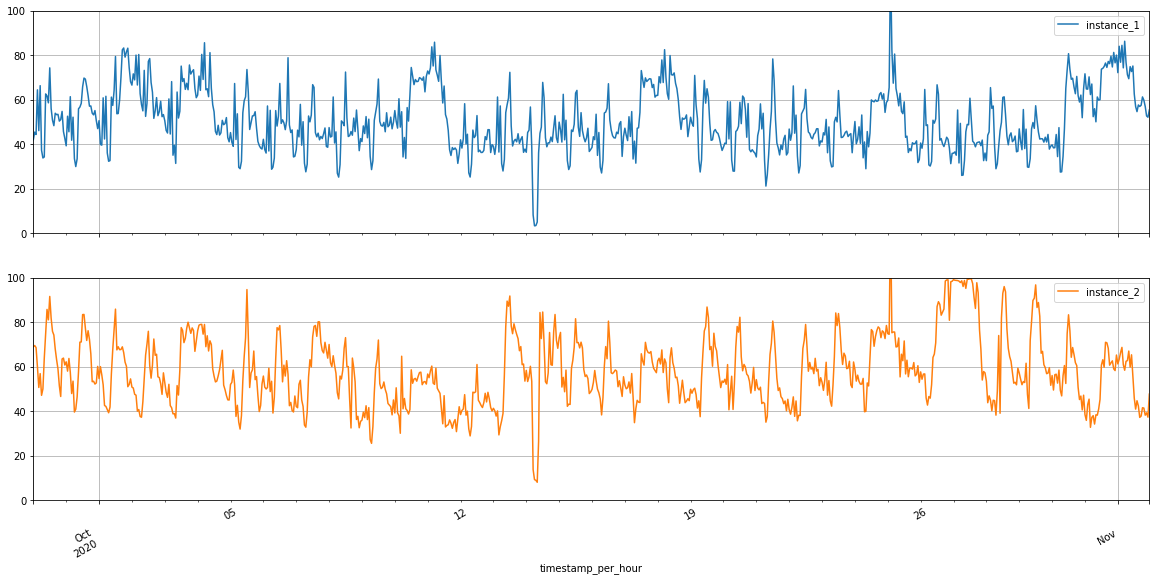

In [5]:
df_pivot.plot(kind='line', grid=True, ylim=(0,100), subplots=True, figsize=(20,10) )

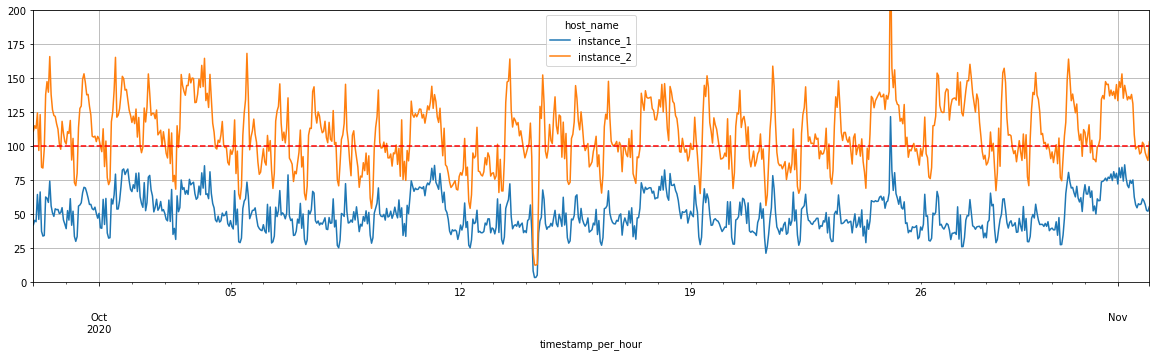

In [9]:
myplot = df_pivot.plot(kind='line', grid=True, ylim=(0,200), figsize=(20,5), stacked=True)
myplot.axhline(y=100, color='red', linestyle ='--')

In [10]:
df_pivot.describe()

host_name,instance_1,instance_2
count,816.000000,816.000000
mean,50.765411,58.046952
std,13.987392,15.643323
min,3.366667,8.120833
25%,41.029167,46.948958
50%,48.341667,56.406250
75%,60.819792,67.673958
max,121.754167,129.908333


In [11]:
df_pivot.median()

host_name
instance_1    48.341667
instance_2    56.406250
dtype: float64

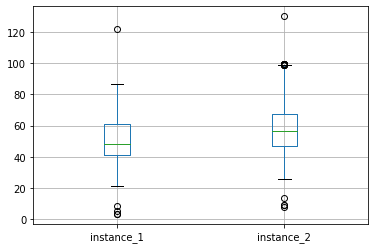

In [12]:
df_pivot.boxplot()

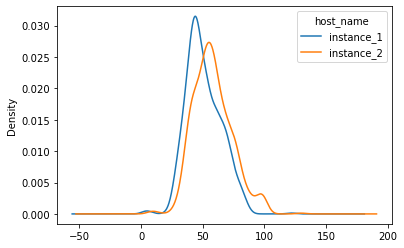

In [13]:
df_pivot.plot.density()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd34cfa4d90>,
      dtype=object)

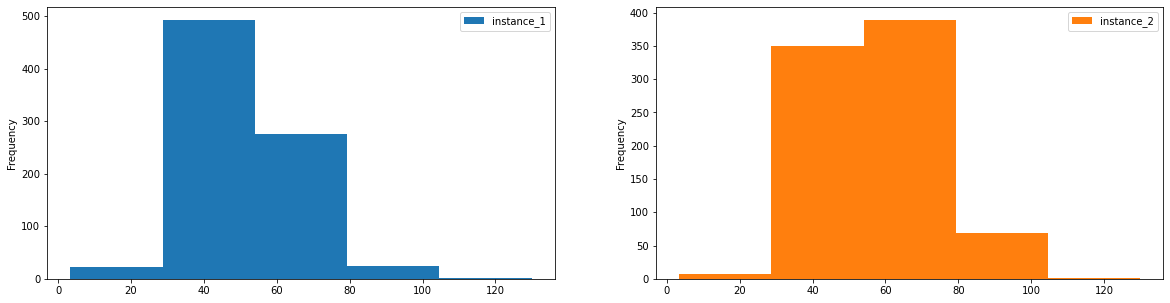

In [14]:
df_pivot.plot.hist(bins=5, subplots=True, layout=(1,2), figsize=(20,5))

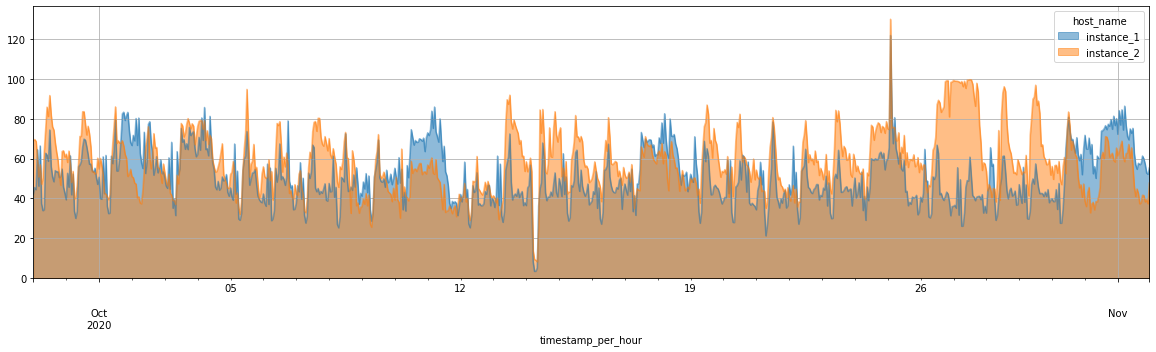

In [15]:
df_pivot.plot.area(figsize=(20,5), grid=True, stacked=False)